# Movie Correlation Project

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)


# Read in the data
df = pd.read_csv("C:/Users/lupak/OneDrive/Área de Trabalho/Data/movies.csv")

In [2]:
# Look for missing data

for i in df.columns:
    missing = np.mean(df[i].isnull())
    print(r"before clean: {} - {}".format(i, missing))

# Drop missing data as there are multiple null columns

df = df.dropna()
for i in df.columns:
    missing = np.mean(df[i].isnull())
    print(r"after clean: {} - {}".format(i, missing))

before clean: name - 0.0
before clean: rating - 0.010041731872717789
before clean: genre - 0.0
before clean: year - 0.0
before clean: released - 0.0002608242044861763
before clean: score - 0.0003912363067292645
before clean: votes - 0.0003912363067292645
before clean: director - 0.0
before clean: writer - 0.0003912363067292645
before clean: star - 0.00013041210224308815
before clean: country - 0.0003912363067292645
before clean: budget - 0.2831246739697444
before clean: gross - 0.02464788732394366
before clean: company - 0.002217005738132499
before clean: runtime - 0.0005216484089723526
after clean: name - 0.0
after clean: rating - 0.0
after clean: genre - 0.0
after clean: year - 0.0
after clean: released - 0.0
after clean: score - 0.0
after clean: votes - 0.0
after clean: director - 0.0
after clean: writer - 0.0
after clean: star - 0.0
after clean: country - 0.0
after clean: budget - 0.0
after clean: gross - 0.0
after clean: company - 0.0
after clean: runtime - 0.0


In [3]:
# Data types of columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
# Change budget, gross and votes data type to integer
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [5]:
# Create columns for year of release

df['released'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [6]:
# Order by gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [7]:
pd.set_option('display.max_rows', None)

In [8]:
# Drop any duplicates
df = df.drop_duplicates()

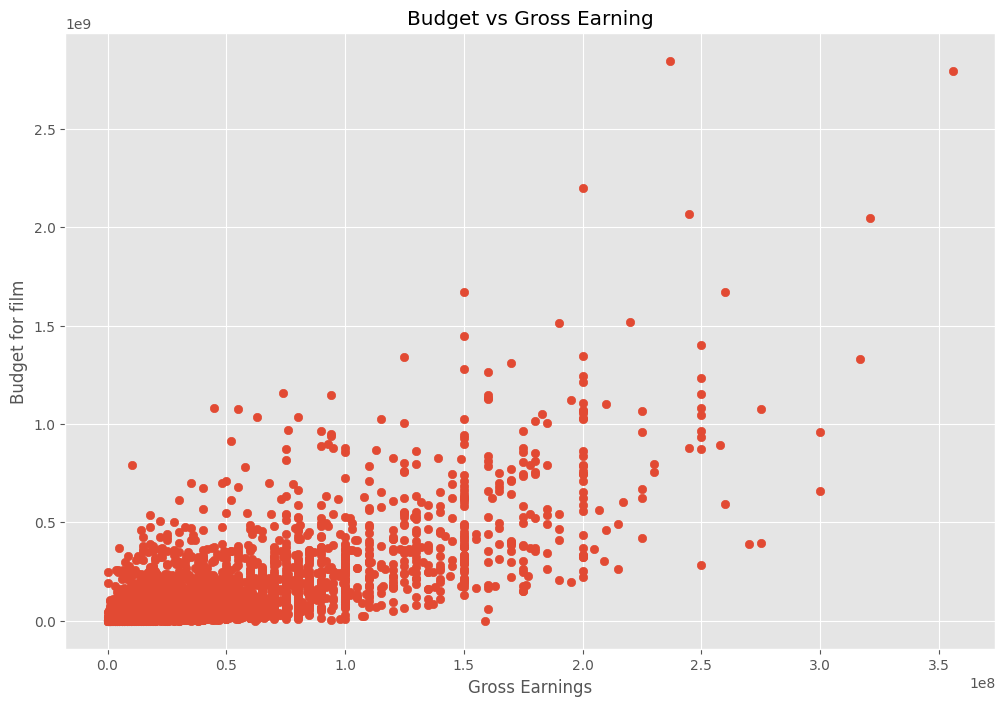

In [9]:
# Build a scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

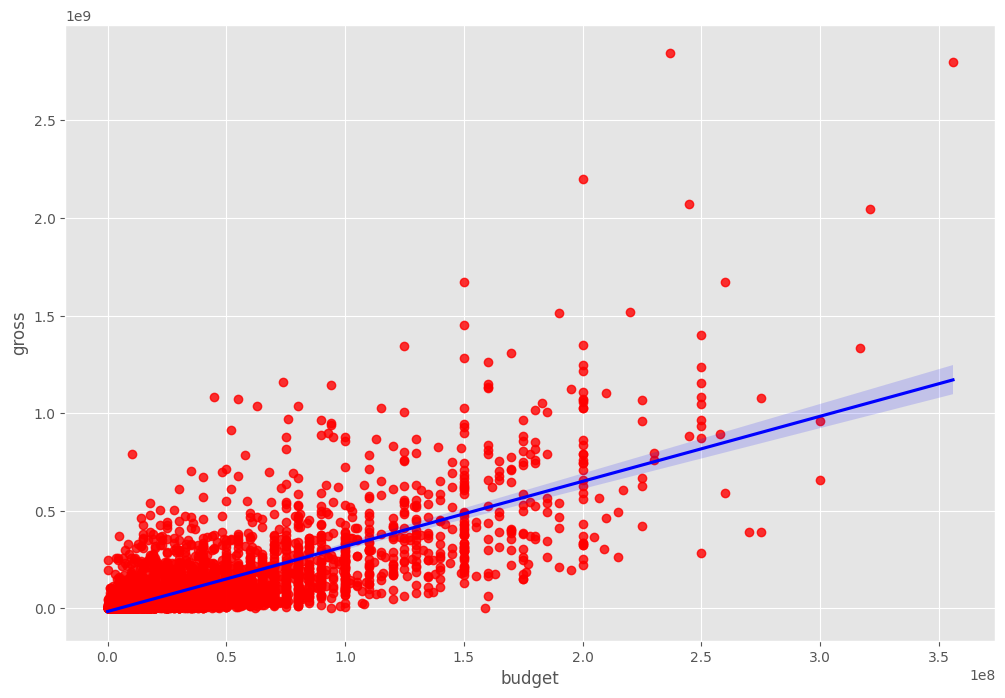

In [25]:
# Plot budget x gross earning using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [10]:
# Looking at the correlation data
df.corr() # pearson

,year,released,score,votes,budget,gross,runtime
year,1.000000,0.998726,0.056386,0.206021,0.327722,0.274321,0.075077
released,0.998726,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.056386,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


In [ ]:
# High correlation between budget and gross 

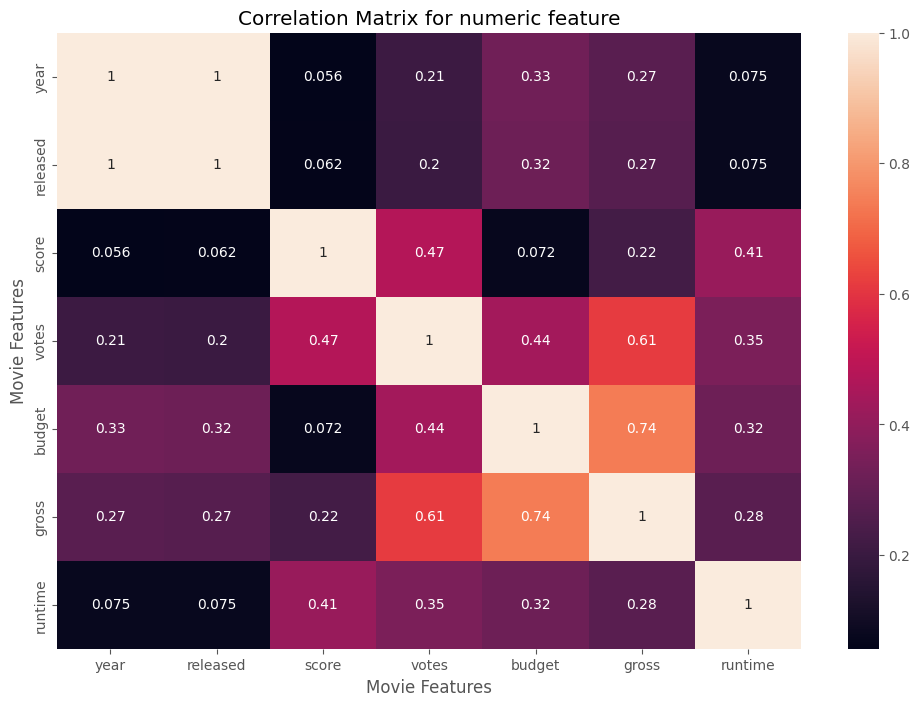

In [11]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for numeric feature')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()